#Name : Mazen Mobtasem Mohamed
#ID : 18100142

In [1]:
from skimage import data, io, exposure
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = data.camera()

[[156 157 160 ... 152 152 152]
 [156 157 159 ... 152 152 152]
 [158 157 156 ... 152 152 152]
 ...
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]
 [121 123 126 ... 121 113 111]]


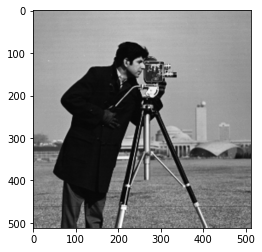

In [3]:
plt.imshow(img,'gray')
print(img)

#First Problem

In [4]:
def BitQuantizeImage(img1,K):
  KBitQImg = np.copy(img1)
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      KBitQImg[i][j]= KBitQImg[i][j]*((2**K)/256)
  return KBitQImg

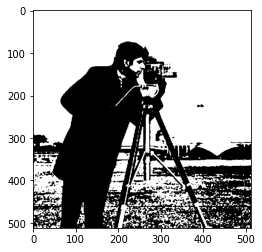

In [5]:
plt.imshow(BitQuantizeImage(img,1),'gray')

#Second Problem
##Image Histogram


In [6]:
def ImageHistogram(img,K):
  img1 = np.copy(img)
  l1 = []
  l2 = []
  for i in range(img1.max()):
    l1.append(0)
    l2.append(i)
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      l1[img1[i][j]-1]+=1
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 6))
  ax1.imshow(img1,'gray')
  ax2.stem(l2,l1)
  img2 = BitQuantizeImage(img1,K)
  l1 = []
  l2 = []
  for i in range(2**K + 1):
    l1.append(0)
    l2.append(i)
  for i in range(img2.shape[0]):
    for j in range(img2.shape[1]):
      if img2[i][j]<=(2**K):
        l1[img2[i][j]]+=1
  return (img2,l2,l1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

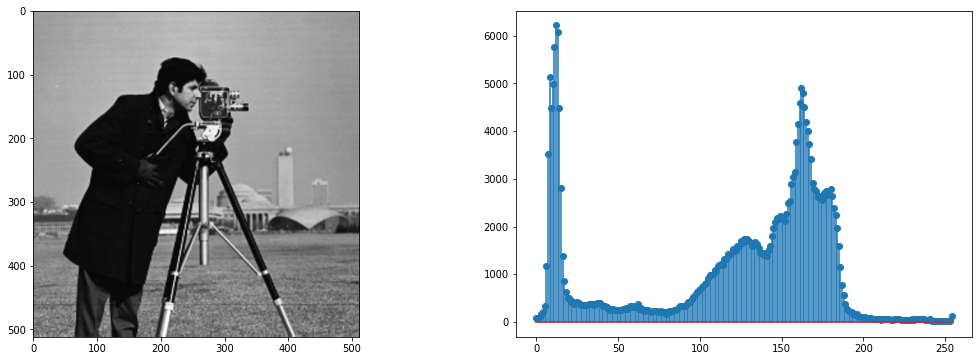

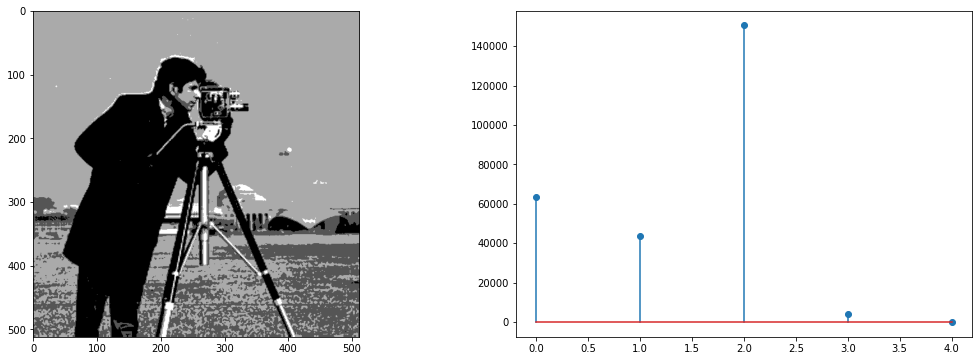

In [7]:
Im1, list3 , list4 = ImageHistogram(img,2)
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 6))
ax1.imshow(Im1,'gray')
ax2.stem(list3,list4)

#Third Problem

In [8]:
def HistogramEqualize(img1):
  img2 = np.copy(img1)
  l1 = []
  l2 = []
  l3 = []
  for i in range(img2.max()+1):
    l1.append(0)
    l2.append(i)
    l3.append(0)
  row = img2.shape[0]
  col = img2.shape[1]
  for i in range(row):
    for j in range(col):
      l1[img2[i][j]]+=1
  
  fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 6))
  ax1.imshow(img1,'gray')
  ax2.stem(l2,l1)
  for i in range(len(l1)):
    l1[i] /= (row * col)
    if i > 0:
      l1[i]+=l1[i-1]
  for i in range(len(l1)):
    l1[i] *= img2.max()

  for i in range(row):
    for j in range(col):
      img2[i][j] = l1[img2[i][j]]

  for i in range(row):
    for j in range(col):
      l3[img2[i][j]]+=1
  
  return (img2,l2,l3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

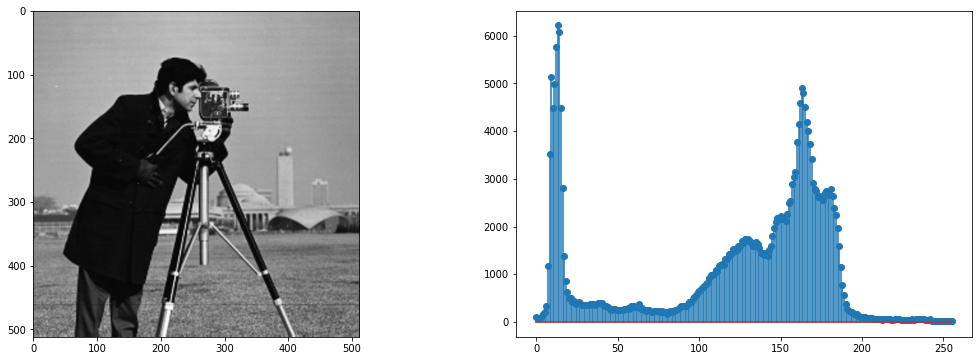

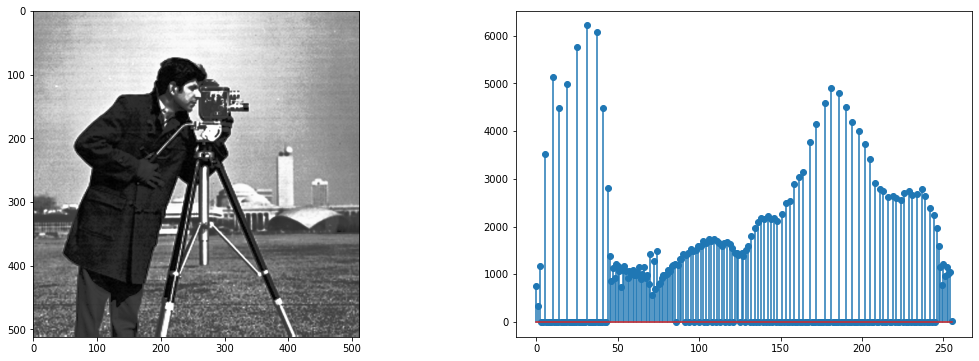

In [9]:
Im , list1,list2 = HistogramEqualize(data.camera())
fig, (ax3,ax4) = plt.subplots(1,2,figsize=(18, 6))
ax3.imshow(Im,'gray')
ax4.stem(list1,list2)

#Testing Third Problem

In [10]:
result = exposure.equalize_hist(data.camera());

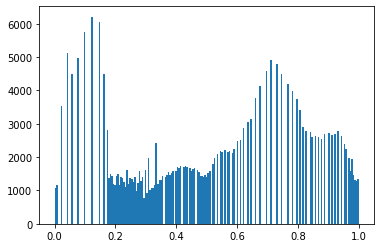

In [11]:
plt.hist(result.ravel(),bins=np.linspace(0, 1, 200));